In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.shape

(1025, 14)

/tmp/ipykernel_20/2198263661.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

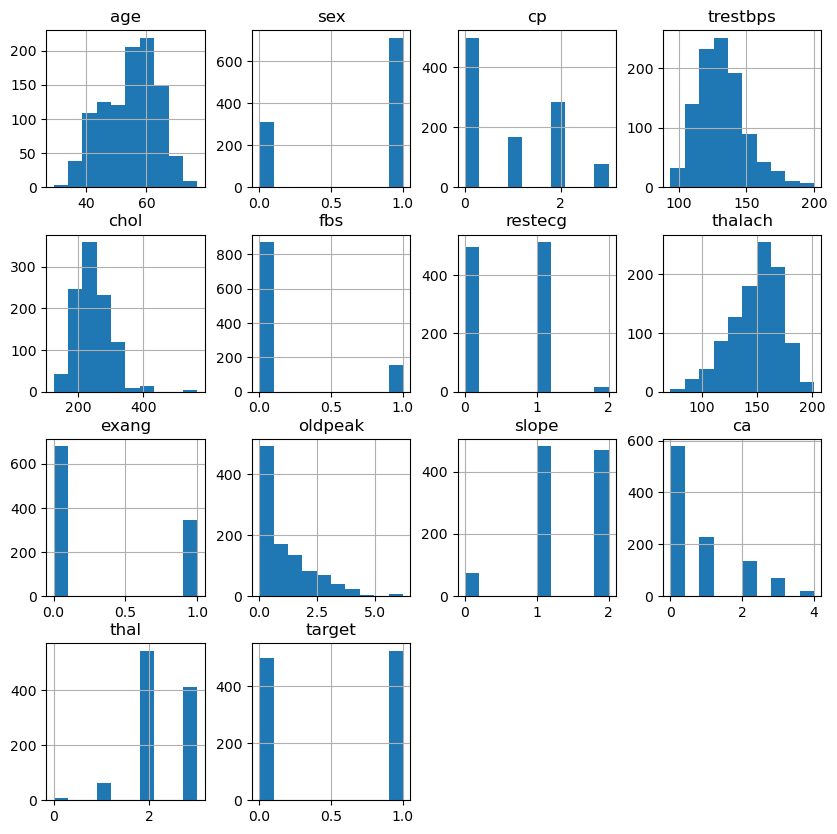

In [7]:
fig,ax=plt.subplots(figsize=(10,10))
df.hist(ax=ax)

**Total Features - 13**

**Categorical Features(8)**- Sex, Cp, Fbs, restecg, exang, slope,ca, thal

**Quantitative Features(5)**- Age, Trestbps, chol, thalach, oldpeak



<Axes: xlabel='target', ylabel='count'>

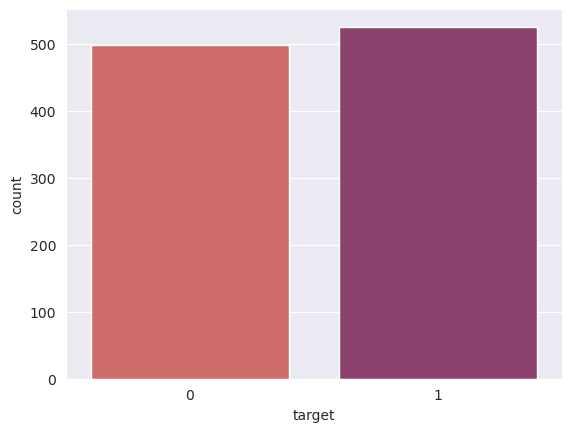

In [8]:
sns.set_style('darkgrid')
sns.countplot(x='target',data=df,palette='flare')

# **Data is Balanced**

In [9]:
data=df.copy()

# **Creating dummies for the model to train perfectly with the categorical features**

In [10]:
data=pd.get_dummies(data,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'],drop_first=True)

In [11]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,140,203,155,3.1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,138,294,106,1.9,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


<Axes: >

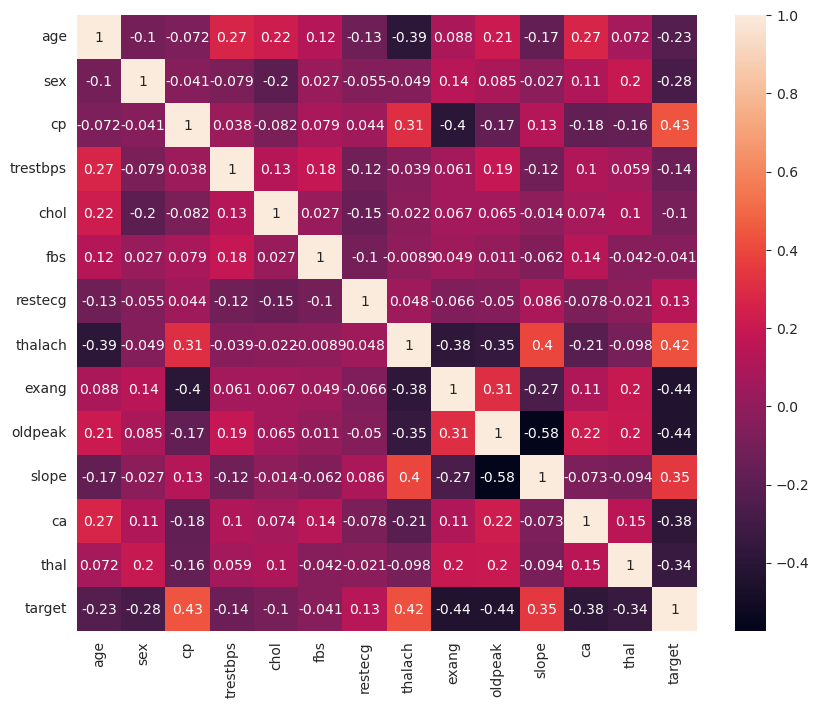

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Standardising the data as they are on different scales

In [13]:
from sklearn.preprocessing import StandardScaler
sts=StandardScaler()
columns_to_scale=['age','trestbps','chol','thalach','oldpeak']
data[columns_to_scale]=sts.fit_transform(data[columns_to_scale])

<Axes: >

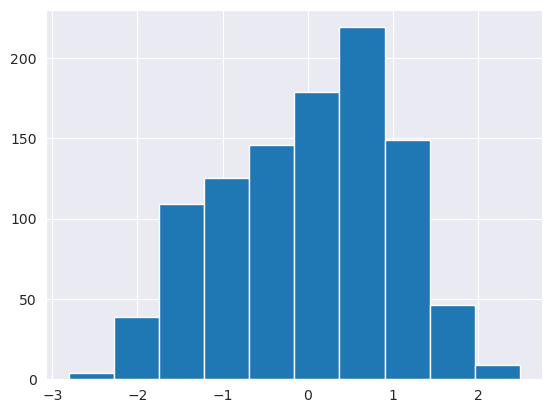

In [14]:
data.age.hist()

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [16]:
y=data['target']
X=data.drop('target',axis=1)

# Checcking for Outliers

/tmp/ipykernel_20/165899330.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i)


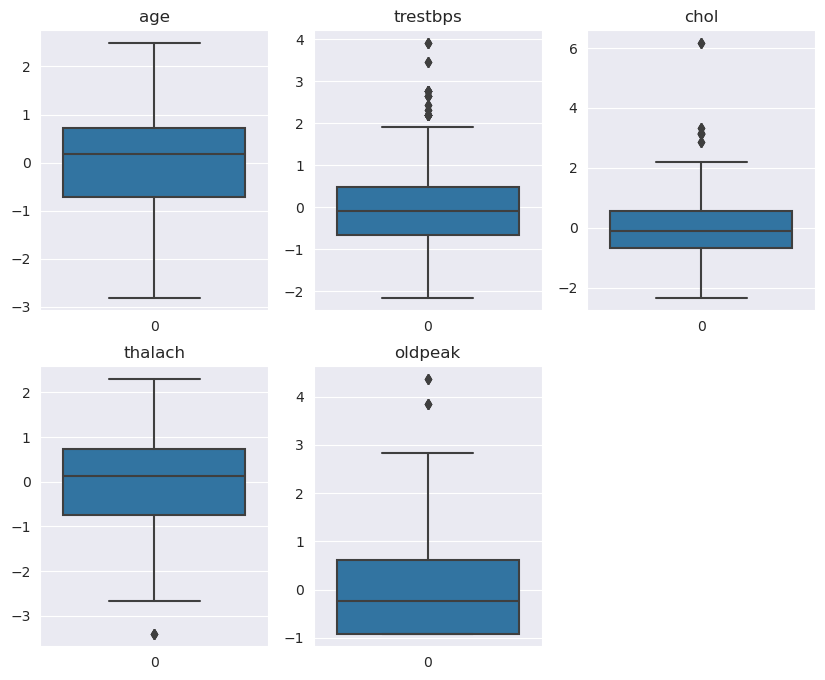

In [17]:
plt.subplots(figsize=(10,8))
i=1
for col in columns_to_scale:
    plt.subplot(2,3,i)
    sns.boxplot(data[col])
    plt.title(col)
    i+=1

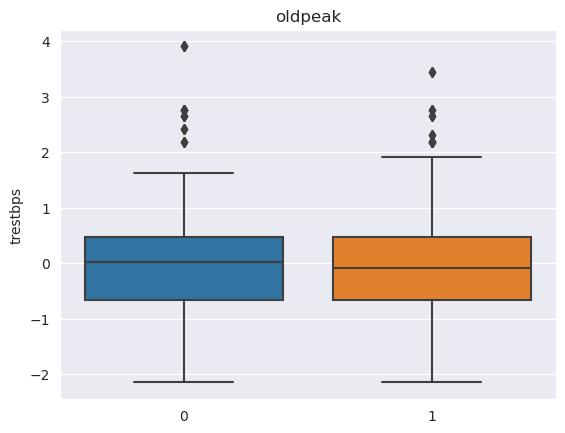

In [18]:
#columns=['sex','cp','fbs','restecg','exang','slope','ca','thal']
#plt.subplots(figsize=(15,10))
#i=1
#for col in columns:
  #  plt.subplot(3,3,i)
ax=sns.boxplot(data=data,x=df['sex'],y='trestbps').set(title=col,xlabel=None)
    #plt.title(col)
    #i+=1

# # Removing Outliers

In [19]:
k=data[(data['trestbps']>2)]
data.drop(k.index,inplace=True)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Classification

In [21]:


# Define the hyperparameter grid
param_grid = {'n_neighbors': np.arange(1, 20),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the grid search object
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train,y_train)

print("Best Hyperparameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

#w/0 normalization - 97.4%
#w normalization - 98.5%

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 19, 'p': 2, 'weights': 'distance'}
Best Accuracy: 0.9853658536585366


In [22]:
best_knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'],
                                 weights=grid.best_params_['weights'],
                                 algorithm=grid.best_params_['algorithm'],
                                 p=grid.best_params_['p'])
best_knn.fit(X_train, y_train)
y_pred1 = best_knn.predict(X_test)


[0]


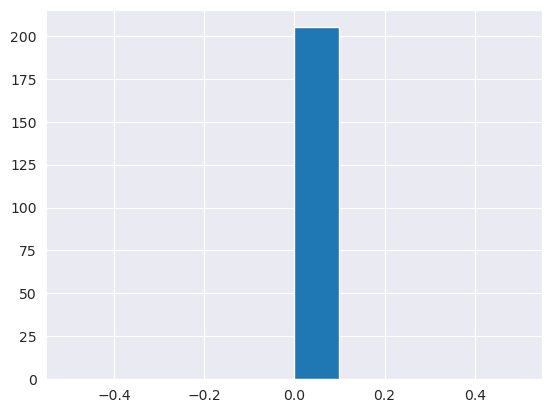

In [23]:
plt.hist(y_pred1-y_test)
print(np.unique(y_pred1-y_test))

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
print("Classification Report:\n", classification_report(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Confusion Matrix:
 [[102   0]
 [  0 103]]


# **RandomForestModel**

In [26]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(30,120,15),
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [27]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


{'max_depth': 30, 'max_features': 'log2', 'n_estimators': 100}

In [28]:
best_rf=RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],max_depth=grid_search.best_params_['max_depth'],max_features=grid_search.best_params_['max_features'])

(array([  0.,   0.,   0.,   0.,   0., 205.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

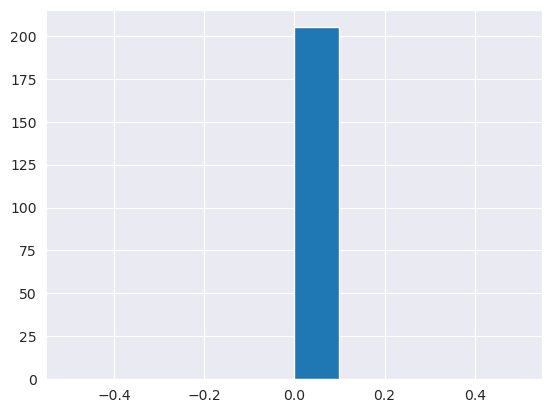

In [29]:
best_rf.fit(X_train,y_train)
y_pred2=best_rf.predict(X_test)
plt.hist(y_pred2-y_test)


In [30]:
print("Classification Report:\n", classification_report(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Confusion Matrix:
 [[102   0]
 [  0 103]]


In [31]:
score=cross_val_score(best_knn,X,y,cv=5)
score.mean()

0.9912195121951219

In [32]:
score2=cross_val_score(best_rf,X,y,cv=5)
score2.mean()


0.9941463414634146